# SIMPLE LINEAR REGRESSION

### 1. Data Collection

In [7]:
import pandas as pd
import seaborn as sns

In [8]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Understanding the Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### 3. Stats Summary

In [10]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 4. Relationship check

Before using any model we have to confirm relationship..?

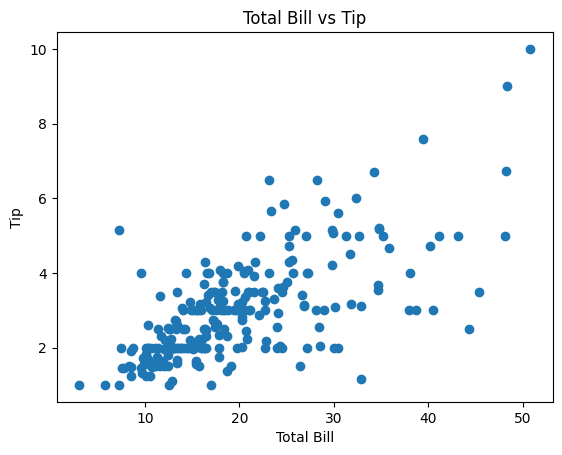

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['total_bill'],df['tip'])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show() 

Observations:
###### 1. As bill increases tip increases
###### 2. Relationship = Straight line(we can use linear regression)

### 5. Feature and target seperation

In [12]:
x = df[['total_bill']] #Feature input must be in 2D
y = df['tip'] #Feature output is in 1D  

### 6. Train-Test Split
##### Model must perform well on unseen data. So, train-test split is done.

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### 7. Feature Standardization
##### 1. Compare the coefficients fairly
##### 2. Avoid the dominance of large values
##### 3. Prepare for Ridge/Lasso


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#IMP
#1. Fit only on training data
#2. Prevent the data leakage

### 8. Train Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled,y_train)
print("Co-efficient(m) : ",model.coef_[0])
print("Intercept(c) : ",model.intercept_)

Co-efficient(m) :  0.9357171400271826
Intercept(c) :  3.0877948717948724


In [16]:
y_pred = model.predict(x_test_scaled)

### 9. Model Evaluation

In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 Score : ",r2)

R2 Score :  0.5449381659234664


In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np 

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("MSE: ",mse)
print("RMSE: ",rmse)


MSE:  0.5688142529229538
RMSE:  0.7541977545199626


### 10. Visualize the Best fit line

Text(0.5, 1.0, 'Linear Regression Best Fit line')

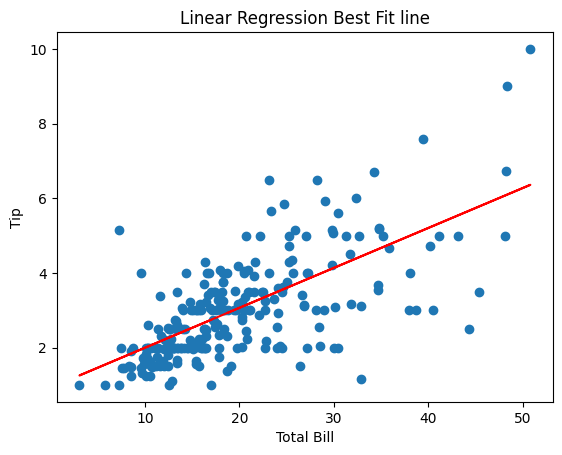

In [19]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color = 'red')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression Best Fit line")

### 11. Prediction

In [20]:
bill_amount = float(input("Enter the bill amount: "))
bill_scaled = scaler.transform([[bill_amount]])
predict_tip = model.predict(bill_scaled)

print(f"Predicted Tip : {predict_tip[0] : .2f}")

Predicted Tip :  107.89


C:\Users\gayat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
